In [3]:
# Normal Equation
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# compute theta using Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# Function we used: y = 4 + 3x1 + Gaussian Noise
theta_best

array([[4.00118802],
       [3.13678714]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00118802],
       [10.27476229]])

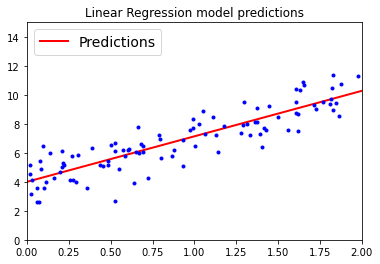

In [19]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Linear Regression model predictions")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

ValueError: illegal value in 4-th argument of internal None